In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import plotly.graph_objects as go
import statsmodels.api as sm
import math
import plotly.express as px
import random
import re
import os

In [202]:
import os

os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/interim', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
df_netflix= pd.read_csv('/content/drive/MyDrive/netflix_titles.csv', usecols=['show_id','title','director','cast','listed_in','description'])
df_titles= pd.read_csv('/content/drive/MyDrive/titles.csv', usecols=['id','title','type','genres','imdb_votes','imdb_score','tmdb_popularity','tmdb_score'])
df_credits= pd.read_csv('/content/drive/MyDrive/credits.csv')
df_imdb= pd.read_csv('/content/drive/MyDrive/imdb_top_1000.csv', usecols=['Series_Title', 'Gross'])

In [205]:
df_netflix['title'] = df_netflix['title'].str.lower().str.strip()
df_titles['title'] = df_titles['title'].str.lower().str.strip()
df_imdb['Series_Title']= df_imdb['Series_Title'].str.lower().str.strip()
df_imdb['Gross']= df_imdb['Gross'].str.lower().str.strip()

In [206]:
def clean_title(text):
    if isinstance(text, str):
        return re.sub(r'[^a-zA-Z0-9\s]', '', text)
    else:
        return text

df_netflix['title'] = df_netflix['title'].apply(clean_title)
df_titles['title'] = df_titles['title'].apply(clean_title)
df_imdb['Series_Title'] = df_imdb['Series_Title'].apply(clean_title)


In [207]:
def remove_suffix(title):
    if isinstance(title, str):  # Checking if the input is a string
        if title.endswith('the movie'):
            return title[:-9].strip()
    return title

# Applying the remove_suffix function to the 'title' column of each DataFrame
df_netflix['title'] = df_netflix['title'].apply(remove_suffix)
df_titles['title'] = df_titles['title'].apply(remove_suffix)
df_imdb['Series_Title'] = df_imdb['Series_Title'].apply(remove_suffix)


In [208]:
merged_df = pd.merge(df_titles, df_credits, on='id', how='inner')
remerged_df = pd.merge(merged_df, df_netflix, on='title', how='inner')
reremerged_df = pd.merge(remerged_df, df_imdb[['Series_Title', 'Gross']], left_on='title', right_on='Series_Title', how='inner')

In [209]:
remerged_df

,id,title,type,genres,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role,show_id,director,cast,listed_in,description
0,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ..."
1,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ..."
2,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ..."
3,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ..."
4,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55104,tm959213,my amanda,MOVIE,"['drama', 'romance']",5.7,308.0,2.908,5.700,290877,Alexander Medina,NaN,ACTOR,s459,Alessandra de Rossi,"Piolo Pascual, Alessandra de Rossi, KC Montero...","Dramas, International Movies, Romantic Movies",Two unusually close friends share every aspect...
55105,tm959213,my amanda,MOVIE,"['drama', 'romance']",5.7,308.0,2.908,5.700,178998,Helga Krapf,NaN,ACTOR,s459,Alessandra de Rossi,"Piolo Pascual, Alessandra de Rossi, KC Montero...","Dramas, International Movies, Romantic Movies",Two unusually close friends share every aspect...
55106,tm959213,my amanda,MOVIE,"['drama', 'romance']",5.7,308.0,2.908,5.700,283530,Joyce Ann Burton,NaN,ACTOR,s459,Alessandra de Rossi,"Piolo Pascual, Alessandra de Rossi, KC Montero...","Dramas, International Movies, Romantic Movies",Two unusually close friends share every aspect...
55107,tm959213,my amanda,MOVIE,"['drama', 'romance']",5.7,308.0,2.908,5.700,134350,Jess Mendoza,NaN,ACTOR,s459,Alessandra de Rossi,"Piolo Pascual, Alessandra de Rossi, KC Montero...","Dramas, International Movies, Romantic Movies",Two unusually close friends share every aspect...


In [210]:

reremerged_df

,id,title,type,genres,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role,show_id,director,cast,listed_in,description,Series_Title,Gross
0,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",taxi driver,"28,262,574"
1,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",taxi driver,"28,262,574"
2,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",taxi driver,"28,262,574"
3,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",taxi driver,"28,262,574"
4,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",taxi driver,"28,262,574"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,66872,Manoj Bajpayee,Musafir Ali,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",ray,"75,331,600"
2475,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,67162,Kay Kay Menon,Indrashish Shah,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",ray,"75,331,600"
2476,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,235529,Harshvardhan Kapoor,Vik,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",ray,"75,331,600"
2477,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,940893,Radhika Madan,Didi,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",ray,"75,331,600"


In [211]:
print(reremerged_df[['title', 'Series_Title']].sample(5))

                            title                 Series_Title
2006                 the irishman                 the irishman
1731                     drishyam                     drishyam
2251                       freaks                       freaks
325   once upon a time in america  once upon a time in america
1514   how to train your dragon 2   how to train your dragon 2


In [212]:
mismatches = reremerged_df[reremerged_df['title'] != reremerged_df['Series_Title']]
print(f"Number of mismatches: {len(mismatches)}")

if len(mismatches) > 0:
    print("Here are some mismatches:")
    print(mismatches[['title', 'Series_Title']].head())

Number of mismatches: 0


In [213]:
reremerged_df.drop('Series_Title', axis=1, inplace=True)

In [214]:
reremerged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2479 non-null   object 
 1   title            2479 non-null   object 
 2   type             2479 non-null   object 
 3   genres           2479 non-null   object 
 4   imdb_score       2384 non-null   float64
 5   imdb_votes       2384 non-null   float64
 6   tmdb_popularity  2479 non-null   float64
 7   tmdb_score       2479 non-null   float64
 8   person_id        2479 non-null   int64  
 9   name             2479 non-null   object 
 10  character        2368 non-null   object 
 11  role             2479 non-null   object 
 12  show_id          2479 non-null   object 
 13  director         2443 non-null   object 
 14  cast             2479 non-null   object 
 15  listed_in        2479 non-null   object 
 16  description      2479 non-null   object 
 17  Gross         

In [215]:
reremerged_df.describe()

,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,2384.000000,2.384000e+03,2479.000000,2479.000000,2.479000e+03
mean,7.785738,4.760895e+05,31.094015,7.583423,3.849510e+05
std,0.797056,4.926980e+05,23.570397,0.670965,5.460216e+05
min,3.100000,3.200000e+01,0.849000,3.700000,2.190000e+02
25%,7.700000,9.964700e+04,15.070000,7.400000,1.387500e+04
50%,7.900000,3.038680e+05,22.225000,7.600000,8.072400e+04
75%,8.200000,6.496760e+05,42.131000,8.000000,6.600315e+05
max,8.800000,2.294231e+06,134.700000,8.463000,2.435238e+06


In [216]:
print(reremerged_df.isnull().sum())

id                   0
title                0
type                 0
genres               0
imdb_score          95
imdb_votes          95
tmdb_popularity      0
tmdb_score           0
person_id            0
name                 0
character          111
role                 0
show_id              0
director            36
cast                 0
listed_in            0
description          0
Gross              287
dtype: int64


In [217]:
reremerged_df.columns = reremerged_df.columns.str.title()

In [218]:
reremerged_df['Imdb_Score'].fillna(reremerged_df['Imdb_Score'].mean(), inplace=True)

reremerged_df['Imdb_Votes'].fillna(reremerged_df['Imdb_Votes'].median(), inplace=True)

reremerged_df['Tmdb_Score'].fillna(reremerged_df['Tmdb_Score'].mean(), inplace=True)

reremerged_df['Director'].fillna('Unknown', inplace=True)

reremerged_df['Character'].fillna('Unknown', inplace=True)

most_common_cast = reremerged_df['Cast'].mode()[0]
reremerged_df['Cast'].fillna(most_common_cast, inplace=True)

# Removing commas
reremerged_df['Gross'] = reremerged_df['Gross'].replace(',', '', regex=True)

# Conversion process
reremerged_df['Gross'] = reremerged_df['Gross'].astype(float)

# Comma separated values can now be treated as decimals when calculating median
gross_median = reremerged_df['Gross'].median()
reremerged_df['Gross'].fillna(gross_median, inplace=True)

In [219]:
print(reremerged_df.isnull().sum())

Id                 0
Title              0
Type               0
Genres             0
Imdb_Score         0
Imdb_Votes         0
Tmdb_Popularity    0
Tmdb_Score         0
Person_Id          0
Name               0
Character          0
Role               0
Show_Id            0
Director           0
Cast               0
Listed_In          0
Description        0
Gross              0
dtype: int64


In [220]:
duplicate_rows = reremerged_df.duplicated().sum()

print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [221]:
reremerged_df

,Id,Title,Type,Genres,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,Person_Id,Name,Character,Role,Show_Id,Director,Cast,Listed_In,Description,Gross
0,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0
1,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0
2,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0
3,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0
4,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,66872,Manoj Bajpayee,Musafir Ali,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0
2475,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,67162,Kay Kay Menon,Indrashish Shah,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0
2476,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,235529,Harshvardhan Kapoor,Vik,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0
2477,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,940893,Radhika Madan,Didi,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0


In [222]:

from scipy import stats
z_scores = stats.zscore(reremerged_df['Imdb_Score'])

threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)

print("location of all outliers:", outliers)

location of all outliers: (array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2420, 2421, 2422, 2423, 2424,
       2425, 2426, 2435, 2436, 2437]),)


In [223]:
#replace outliers with average
reremerged_df['Imdb_Score'].loc[outliers[0]] = reremerged_df['Imdb_Score'].mean()

<ipython-input-223-f21c0b083563>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reremerged_df['Imdb_Score'].loc[outliers[0]] = reremerged_df['Imdb_Score'].mean()


In [224]:
#outliers for gross
z_scores_gross = stats.zscore(reremerged_df['Gross'])
outliers_gross = np.where(np.abs(z_scores_gross) > threshold)
print("gross outliers location:", outliers_gross)

gross outliers location: (array([623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635,
       636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648,
       649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661,
       662, 663, 664, 665, 666, 667, 668, 669, 670]),)


In [228]:
#filling outliers with median
median_value = reremerged_df['Gross'].median()
reremerged_df.loc[outliers_gross[0], 'Gross'] = median_value

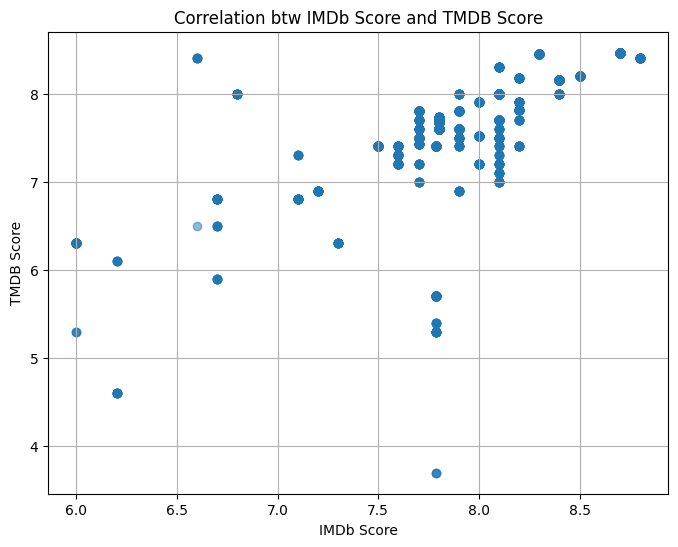

In [229]:
plt.figure(figsize=(8, 6))
plt.scatter(reremerged_df['Imdb_Score'], reremerged_df['Tmdb_Score'], alpha=0.5)
plt.title('Correlation btw IMDb Score and TMDB Score')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.grid(True)
plt.show()

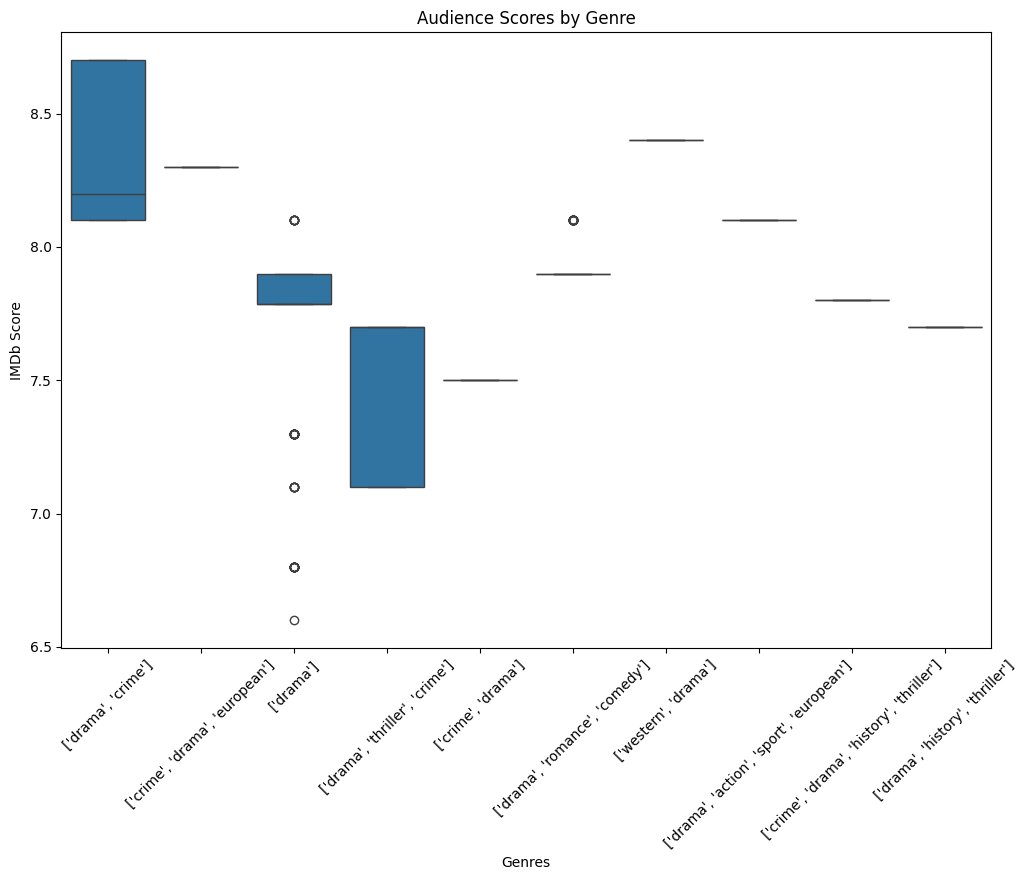

In [230]:
top_genres = reremerged_df['Genres'].value_counts().head(10).index

filtered_df = reremerged_df[reremerged_df['Genres'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Genres', y='Imdb_Score', data=filtered_df)
plt.title('Audience Scores by Genre')
plt.xlabel('Genres')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()

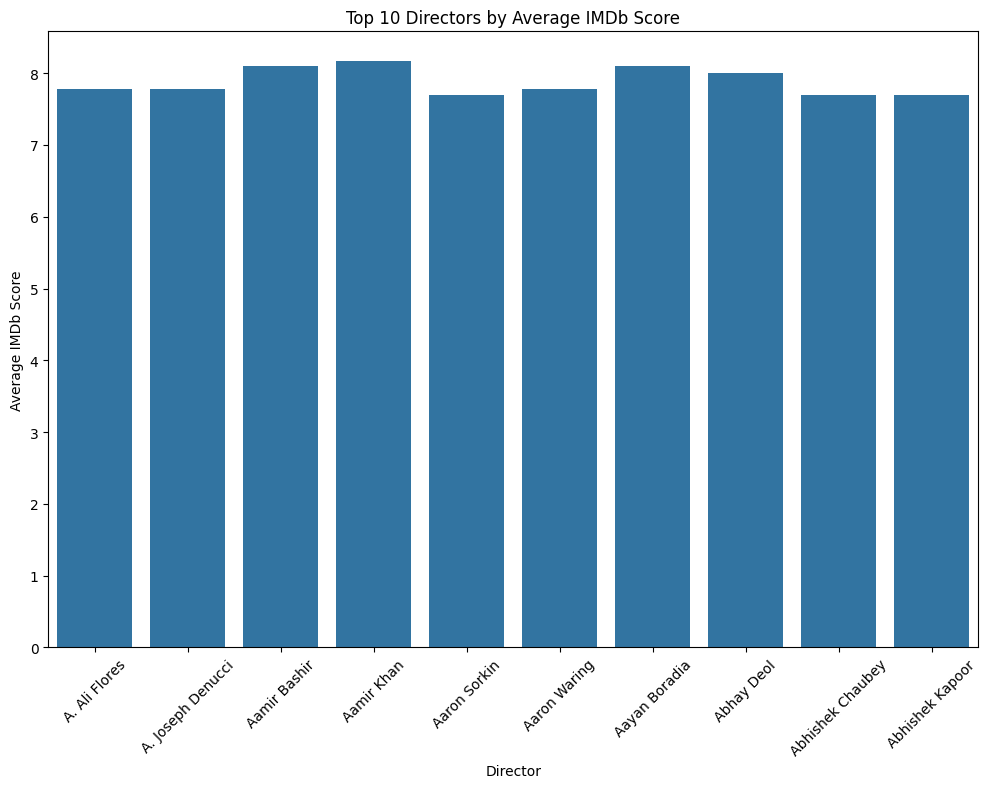

In [231]:
director_avg_imdb_scores = reremerged_df.groupby('Name')['Imdb_Score'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Name', y='Imdb_Score', data=director_avg_imdb_scores.head(10))
plt.title('Top 10 Directors by Average IMDb Score')
plt.xlabel('Director')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()

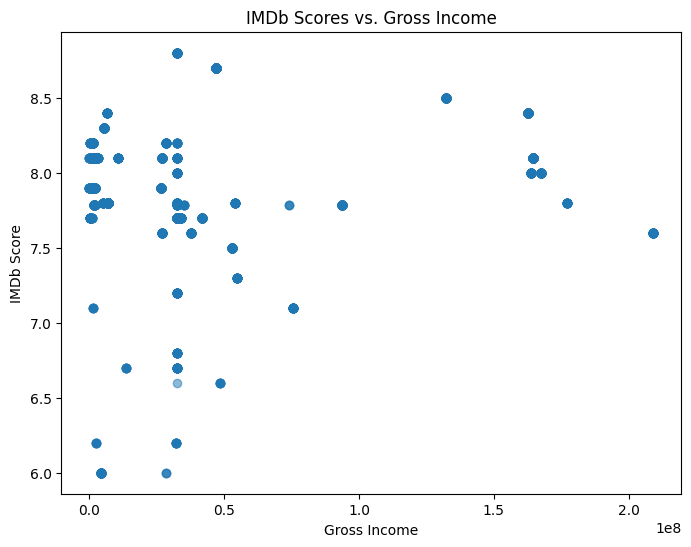

In [232]:
plt.figure(figsize=(8, 6))
plt.scatter(reremerged_df['Gross'], reremerged_df['Imdb_Score'], alpha=0.5)
plt.title('IMDb Scores vs. Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('IMDb Score')
plt.show()

In [233]:
import pandas as pd

df_credits = pd.read_csv('/content/data/raw/credits.csv')
df_titles = pd.read_csv('/content/data/raw/titles.csv')

df_merged = pd.merge(df_credits, df_titles, on='id', how='inner')

# calculating popularity index for actors
actor_popularity = df_merged[df_merged['role'] == 'ACTOR'].groupby('name')['imdb_score'].mean().reset_index()
actor_popularity.columns = ['Name', 'Actor_Popularity_Index']

# calculating popularity index for directors
director_popularity = df_merged[df_merged['role'] == 'DIRECTOR'].groupby('name')['imdb_score'].mean().reset_index()
director_popularity.columns = ['Name', 'Director_Popularity_Index']

# merging populariry indices
popularity_df = pd.concat([actor_popularity, director_popularity], ignore_index=True)

# function to add popularity index to original data frame
def get_popularity_index(row, popularity_df):
    if row['Role'] == 'ACTOR':
        popularity_score = popularity_df[popularity_df['Name'] == row['Name']]['Actor_Popularity_Index'].values
    elif row['Role'] == 'DIRECTOR':
        popularity_score = popularity_df[popularity_df['Name'] == row['Name']]['Director_Popularity_Index'].values
    else:
        popularity_score = [0]

    return popularity_score[0] if len(popularity_score) > 0 else 0


reremerged_df['Popularity_Index'] = reremerged_df.apply(lambda row: get_popularity_index(row, popularity_df), axis=1)


print(reremerged_df.head())


        Id        Title   Type              Genres  Imdb_Score  Imdb_Votes  \
0  tm84618  taxi driver  MOVIE  ['drama', 'crime']         8.2    808582.0   
1  tm84618  taxi driver  MOVIE  ['drama', 'crime']         8.2    808582.0   
2  tm84618  taxi driver  MOVIE  ['drama', 'crime']         8.2    808582.0   
3  tm84618  taxi driver  MOVIE  ['drama', 'crime']         8.2    808582.0   
4  tm84618  taxi driver  MOVIE  ['drama', 'crime']         8.2    808582.0   

   Tmdb_Popularity  Tmdb_Score  Person_Id             Name  \
0           40.965       8.179       3748   Robert De Niro   
1           40.965       8.179      14658     Jodie Foster   
2           40.965       8.179       7064    Albert Brooks   
3           40.965       8.179       3739    Harvey Keitel   
4           40.965       8.179      48933  Cybill Shepherd   

                 Character   Role Show_Id       Director  \
0            Travis Bickle  ACTOR   s2882  Daniel Oriahi   
1            Iris Steensma  ACTOR   s2

In [234]:

print(reremerged_df['Popularity_Index'].describe())

count    2376.000000
mean        6.551465
std         2.697923
min         0.000000
25%         6.666667
50%         7.600000
75%         8.100000
max         8.800000
Name: Popularity_Index, dtype: float64


In [235]:
reremerged_df

,Id,Title,Type,Genres,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,Person_Id,Name,Character,Role,Show_Id,Director,Cast,Listed_In,Description,Gross,Popularity_Index
0,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0,8.000000
1,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0,8.200000
2,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0,8.200000
3,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0,6.500000
4,tm84618,taxi driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0,7.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,66872,Manoj Bajpayee,Musafir Ali,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0,6.185714
2475,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,67162,Kay Kay Menon,Indrashish Shah,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0,6.912500
2476,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,235529,Harshvardhan Kapoor,Vik,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0,7.600000
2477,ts288540,ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,940893,Radhika Madan,Didi,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Mean Squared Error: 0.00044746591011625127
R^2 Score: 0.9981844273232854


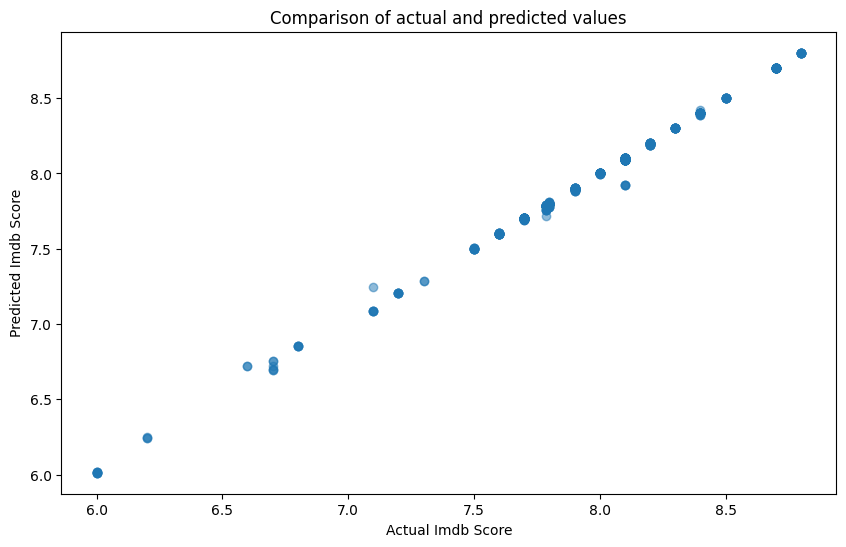

In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Remove unnecessary columns
X = reremerged_df.drop(columns=['Imdb_Score', 'Id', 'Title', 'Type', 'Description', 'Show_Id', 'Listed_In', 'Cast', 'Character'])
y = reremerged_df['Imdb_Score']

# Determine categorical and numeric columns
categorical_features = ['Genres', 'Role', 'Director', 'Name']
numeric_features = X.columns.difference(categorical_features)

# Preprocessing steps to convert categorical and numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Separating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions with test data set
y_pred = model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Comparison of actual and predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Imdb Score")
plt.ylabel("Predicted Imdb Score")
plt.title("Comparison of actual and predicted values")
plt.show()


Index(['Id', 'Title', 'Type', 'Genres', 'Imdb_Score', 'Imdb_Votes',
       'Tmdb_Popularity', 'Tmdb_Score', 'Person_Id', 'Name', 'Character',
       'Role', 'Show_Id', 'Director', 'Cast', 'Listed_In', 'Description',
       'Gross', 'Popularity_Index'],
      dtype='object')
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Random Forest Mean Squared Error: 1.7323496981696862
Random Forest R^2 Score: 0.7529654672194624


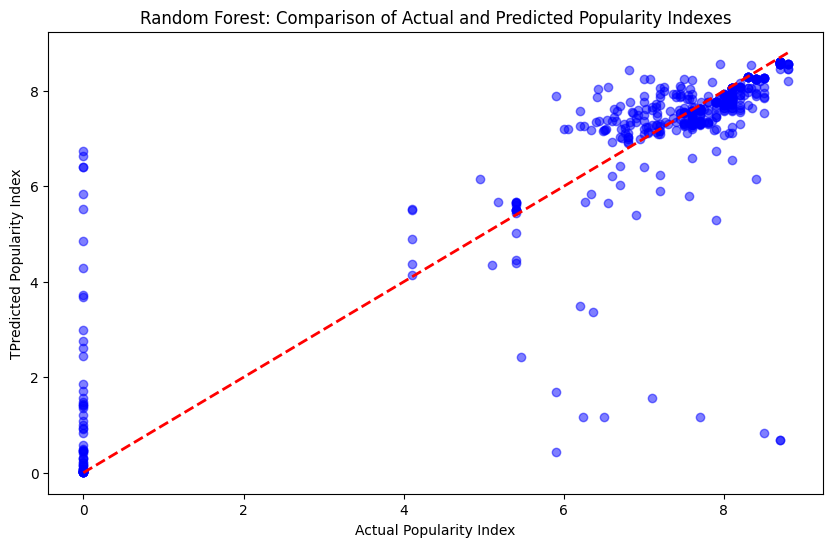

   Gerçek Değer  Tahmin Edilen Değer
0      6.766667             7.126585
1      8.300000             8.052610
2      6.700000             6.424891
3      7.800000             7.318151
4      8.200000             8.083725
5      4.950000             6.145672
6      0.000000             0.023823
7      6.511111             7.179416
8      7.600000             7.415069
9      0.000000             0.450642


In [238]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

print(reremerged_df.columns)

# Explode the 'Genres' column
exploded_df = reremerged_df.explode('Genres')

# Remove unnecessary columns
X = exploded_df.drop(columns=['Popularity_Index', 'Id', 'Title', 'Type', 'Description', 'Show_Id', 'Listed_In', 'Cast', 'Character'])
y = exploded_df['Popularity_Index']

# Checking and filling missing values
imputer = SimpleImputer(strategy='median')
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Determine categorical and numeric columns
categorical_features = ['Genres', 'Role', 'Director', 'Name']
numeric_features = X.columns.difference(categorical_features)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

  # Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

# Hyperparameter optimization with Grid Search CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Separating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Choosing the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with test data set
y_pred_rf = best_rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

# Comparison of actual and predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Popularity Index")
plt.ylabel("TPredicted Popularity Index")
plt.title("Random Forest: Comparison of Actual and Predicted Popularity Indexes")
plt.show()

# Compare the first few predictions and the actual value
comparison_df_rf = pd.DataFrame({'Gerçek Değer': y_test, 'Tahmin Edilen Değer': y_pred_rf})
print(comparison_df_rf.head(10))
